In [1]:
#####################################
## modules et bibliothèques python ##
#####################################
# Import library
import numpy as np
import xarray as xr
from netCDF4 import Dataset

from matplotlib import pyplot as plt
#import matplotlib as mpl
#from matplotlib import cm
#from colorspacious import cspace_converterment
In the ORCA2 experimentation, the distribution of the tracers is very fast as shown is
the figure 3. After the first iteration step, which corresponds to 1200 seconds, a large
portion of tracers reached a higher depth. Then, all the tracers are distributed in the
water column. On the same figure, the mean value 
#import matplotlib.colors
#import matplotlib.dates as mpd
from mpl_toolkits.basemap import Basemap

import os
import sys
import cartopy
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from cartopy.mpl.gridliner import LONGITUDE_FORMATTER, LATITUDE_FORMATTER
import random
import statistics
import warnings

In [2]:
from dask.distributed import Client

client = Client(n_workers=8)
client


/gpfslocalsup/pub/anaconda-py3/2020.11/envs/climate_science/lib/python3.9/site-packages/distributed/node.py:151: UserWarning: Port 8787 is already in use.
Perhaps you already have a cluster running?
Hosting the HTTP server on port 37305 instead
  warnings.warn(
ERROR:asyncio:Task exception was never retrieved
future: <Task finished name='Task-12' coro=<_wrap_awaitable() done, defined at /gpfslocalsup/pub/anaconda-py3/2020.11/envs/climate_science/lib/python3.9/asyncio/tasks.py:680> exception=ImportError("cannot import name 'Popen' from partially initialized module 'multiprocessing.popen_spawn_posix' (most likely due to a circular import) (/gpfslocalsup/pub/anaconda-py3/2020.11/envs/climate_science/lib/python3.9/multiprocessing/popen_spawn_posix.py)")>
Traceback (most recent call last):
  File "/gpfslocalsup/pub/anaconda-py3/2020.11/envs/climate_science/lib/python3.9/asyncio/tasks.py", line 687, in _wrap_awaitable
    return (yield from awaitable.__await__())
  File "/gpfslocalsup/pub/an

KeyboardInterrupt: 

In [4]:
# Get the data for the grid
dir = '/gpfswork/rech/hjl/uab91nb/'

## Read Data ##
file_ini = 'eORCA025.L75_GLOBAL/eORCA025.L75-OFF-Exp1-S/1ts_global/eORCA025.L75-OFF-Exp1_y2000m01.1ts_20000101.nc'
#file = 'eORCA025.L75_GLOBAL/eORCA025.L75-OFF-Exp1-S/1d_global/2000/eORCA025.L75-OFF-Exp1_*.nc'

#ds = xr.open_mfdataset(dir+file)
ds_ini = xr.open_dataset(dir+file_ini)
ds_ini

<xarray.Dataset>
Dimensions:               (y: 1207, x: 1442, deptht: 75, axis_nbounds: 2,
                           time_counter: 6)
Coordinates:
    nav_lat               (y, x) float32 ...
    nav_lon               (y, x) float32 ...
  * deptht                (deptht) float32 0.5058 1.556 ... 5.698e+03 5.902e+03
    time_centered         (time_counter) datetime64[ns] ...
  * time_counter          (time_counter) datetime64[ns] 2000-01-01T00:10:00 ....
Dimensions without coordinates: y, x, axis_nbounds
Data variables:
    deptht_bounds         (deptht, axis_nbounds) float32 ...
    time_centered_bounds  (time_counter, axis_nbounds) datetime64[ns] ...
    time_counter_bounds   (time_counter, axis_nbounds) datetime64[ns] ...
    MyTrc                 (time_counter, deptht, y, x) float32 ...
Attributes:
    description:  passive tracers variables
    title:        passive tracers variables
    Conventions:  CF-1.6
    uuid:         2ad5c9f2-a005-4904-b4c1-44db7e808739

In [5]:
def profiles_vert(data):
    profil = data.mean(dim=["y","x"], skipna=True)
    return profil

def barycentre_vert(z,profil):
    bary = z*profil
    bary = bary.sum(dim=['deptht'],skipna=True)/profil.sum(skipna=True)
    return bary

In [6]:
%%time

profiles_ini = profiles_vert(ds_ini.MyTrc[0,:,:,:])
profiles_ini.to_netcdf(f'./Vert_profiles_ini.nc')

CPU times: user 1.43 s, sys: 480 ms, total: 1.91 s
Wall time: 1.83 s


In [ ]:
%%time
for year in np.arange(6)+2005:
    print(" Current year treated :", year )
    !date
    file = 'eORCA025.L75_GLOBAL/eORCA025.L75-OFF-Exp1-S/1d_global/'+str(year)+'/eORCA025.L75-OFF-Exp1_*.nc'
    ds = xr.open_mfdataset(dir+file)
    all_profiles = profiles_vert(ds.MyTrc[:,:,:,:])
    print(" Start the calculation")
    all_profiles.compute()
    !date
    print(" Start to save the result")
    all_profiles.to_netcdf('Vert_profiles_y'+str(year)+'.nc')


 Current year treated : 2005
Thu Aug 10 16:11:41 CEST 2023
 Start the calculation
Thu Aug 10 16:14:36 CEST 2023
 Start to save the result
 Current year treated : 2006
Thu Aug 10 16:17:20 CEST 2023
 Start the calculation
Thu Aug 10 16:20:14 CEST 2023
 Start to save the result
 Current year treated : 2007
Thu Aug 10 16:23:11 CEST 2023
 Start the calculation
Thu Aug 10 16:26:13 CEST 2023
 Start to save the result
 Current year treated : 2008
Thu Aug 10 16:29:22 CEST 2023
 Start the calculation


In [8]:
for i in range(0,10,10): #365
    #warnings.filterwarnings("ignore", category=RuntimeWarning)
    all_profiles = profiles_vert(ds.MyTrc[0+i:9+i,:,:,:])
    all_profiles.to_netcdf(f'Vert_profiles_{i}.nc')
    

CPU times: user 17.6 s, sys: 4.38 s, total: 21.9 s
Wall time: 22.2 s


/gpfslocalsup/pub/anaconda-py3/2020.11/envs/climate_science/lib/python3.9/site-packages/dask/array/numpy_compat.py:40: RuntimeWarning: invalid value encountered in true_divide
  x = np.divide(x1, x2, out)


In [9]:
ds_t = xr.open_mfdataset('./Vert_profiles_y2000.nc')
ds_t.MyTrc

ValueError: Every dimension needs a coordinate for inferring concatenation order

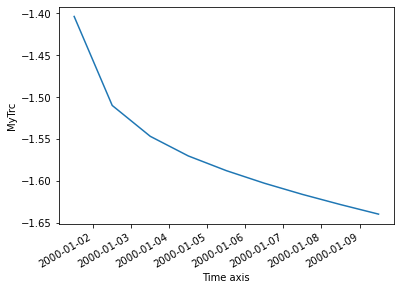

In [6]:
depth_values = ds.deptht.values

barycenter = barycentre_vert(-depth_values,ds_t.MyTrc)
barycenter.plot()